In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt 

#set parameters for geometric brownian motion

a = 2
b = 1
sigma =0.5
x0 = 1

#Simulation parameters
T = 1
N_grid = [100, 300, 1000, 3000, 10000]
samples = 100


#initialize error vectors
EM_error = []
Mil_error = []
DF_error = []

#loop for different step sizes
for N in N_grid:
    dt = T/N
    dt_coarse = 10*dt
    t = np.arange(dt, 1 + dt, dt)
    t_coarse = t[::10]

    #initialize arrays for the sample paths
    EM = np.zeros((samples, N+1))
    EM_coarse = np.zeros((samples, N//10 +1))
    Mil = np.zeros((samples, N + 1))
    Mil_coarse = np.zeros((samples, N//10 +1))
    DF = np.zeros((samples, N + 1))
    DF_coarse = np.zeros((samples, N//10 +1))

    #setting starting values
    EM[:,0] = x0
    EM_coarse[:,0] = x0
    Mil[:,0] = x0
    Mil_coarse[:,0] = x0
    DF[:,0] = x0
    DF_coarse[:,0] = x0

    #initialize error vectors
    EM_error_sum = 0
    Mil_error_sum = 0
    DF_error_sum = 0


    #generate sample paths:
    for i in range(samples):
        np.random.seed(i)
        #generate random numbers
        random_numbers = np.random.randn(N)

        #generate brownian motion
        dW = np.sqrt(dt)*random_numbers
        W = np.cumsum(dW)

        #getting the coarse grid
        dW_coarse =  np.array([sum(dW[i: i+10]) for i in range(0,N,10)])
        W_coarse = W[::10]

        #simulate for the fine grid
        for j in range(N):

            #Euler-Maruyama
            EM[i,j+1] = EM[i,j] + a*(b - EM[i,j])*dt + sigma*(EM[i,j])*dW[j]

            #Milstein
            Mil[i,j+1] = Mil[i,j] + a*(b-Mil[i,j])*dt + sigma*(Mil[i,j])*dW[j] + (1/2) * Mil[i,j]*(sigma**2)*(dW[j]**2 -dt)

            #Deriv-free
            S = np.random.choice([-1,1])
            xi = 1/2*(np.sqrt(dt)) *(dW[j]**2 - (dt)) * S * 1/2
            mil = sigma**2 *(DF[i,j]) *xi * S * np.sqrt(dt)
            DF[i,j+1] = DF[i,j] + a*(b - DF[i,j])*dt + sigma*(np.sqrt(DF[i,j]))*dW[j] + mil
            

        #simulate for the coarse grid
        for j in range(N//10):

            #Euler-Maruyama
            EM_coarse[i,j+1] = EM_coarse[i,j] + a*(b - EM_coarse[i,j])*dt_coarse + sigma*(EM_coarse[i,j])*dW_coarse[j]

            #Milstein
            Mil_coarse[i,j+1] = Mil_coarse[i,j] + a*(b-Mil_coarse[i,j])*dt_coarse + sigma*(Mil_coarse[i,j])*dW_coarse[j] + (1/2) * Mil_coarse[i,j] *(sigma**2)*(dW_coarse[j]**2 - dt_coarse)

            #Deriv-free
            S = np.random.choice([-1,1])
            xi = 1/(2*np.sqrt(dt_coarse)) *(dW_coarse[j]**2 - (dt_coarse)) * S * 1/2
            mil = sigma**2 *(DF_coarse[i,j]) *xi * S * np.sqrt(dt_coarse)
            DF_coarse[i,j+1] = DF_coarse[i,j] + a*(b - DF_coarse[i,j])*dt_coarse + sigma*(np.sqrt(DF_coarse[i,j]))*dW_coarse[j] + mil
        
        
        #error 
        EM_path_error = abs(EM_coarse[i,:-1] - EM[i,:-1][::10])
        Mil_path_error = abs(Mil_coarse[i,:-1] - Mil[i,:-1][::10])
        DF_path_error = abs(DF_coarse[i,:-1] - DF[i,:-1][::10])


        EM_error_sum += EM_path_error
        Mil_error_sum += Mil_path_error
        DF_error_sum += DF_path_error

    print(N)
    EM_error.append( np.mean(EM_error_sum/samples))
    Mil_error.append( np.mean(Mil_error_sum/samples))
    DF_error.append( np.mean(DF_error_sum/samples))


100
300
1000
3000
10000


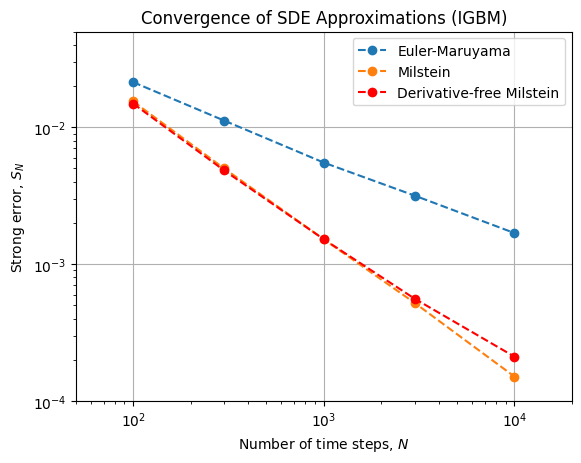

Em rate = -0.514306861266703 
Mil rate = -1.0022572756397088 
DF rate = -0.8569286223108578
DF error = 0.00021132011958351603


In [23]:
dt_grid = [T/N for N in N_grid]

#plotting the results
plt.figure()
plt.grid()
plt.xlim(5 * 10**1, 2 * 10**4)
plt.ylim(10**-4, 1/2 * 10**-1)
plt.plot(N_grid, EM_error, label = 'Euler-Maruyama', marker = 'o', ls = '--')
plt.plot(N_grid, Mil_error, label = 'Milstein', marker = 'o', ls = '--')
plt.plot(N_grid, DF_error, 'red', label = 'Derivative-free Milstein', marker = 'o', ls = '--')
plt.title('Convergence of SDE Approximations (IGBM)')
plt.xlabel('Number of time steps, $N$'); plt.ylabel('Strong error, $S_N$'); plt.legend(loc=2);
plt.loglog()
plt.legend()
plt.show()

#calculate the convergence rates
print('Em rate =', np.log10(EM_error[-1]/EM_error[-3]),
      '\nMil rate =',np.log10(Mil_error[-1]/Mil_error[-3]),
      '\nDF rate =', np.log10(DF_error[-1]/DF_error[-3]))

print('DF error =', DF_error[-1])
